In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bootcampviztools import *

In [38]:
health = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\EDA_Patricia_Diez\EDA_Entrega\src\data\health_cleaned.csv")
health.head(2)

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Has_condition
0,32,Non-Binary,Hr,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,Yes
1,40,Female,Data Scientist,It,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,Yes


Vistos lo análisis, nos vamos a centrar en esas relaciones: 

Job_Role - Has_condition   
Work_Location - Satisfaction_with_Remote_Work   
Stress_Level - Access_to_Mental_Health_Resources   
Productivity_Change - Sleep_Quality   
Mental_Health_Condition - Productivity_Change   
Access_to_Mental_Health_Resources - Productivity_Change   
Vistos lo análisis, nos vamos a centrar en esas relaciones: 


Gender - Social_Isolation_Rating         
Work_Location - Number_of_Virtual_Meetings        
Access_to_Mental_Health_Resources - Years_of_Experience               


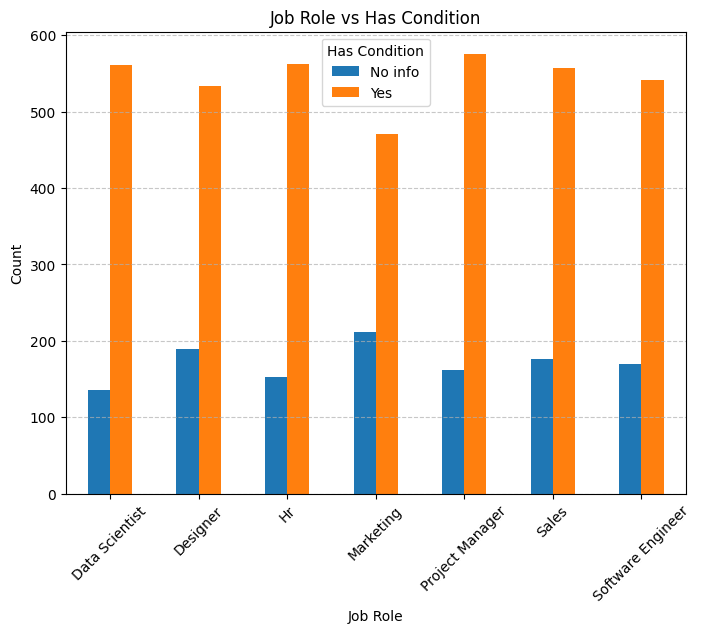

In [41]:
job_condition = health.groupby(['Job_Role', 'Has_condition']).size().unstack()

job_condition.plot(kind='bar', figsize=(8, 6))
plt.title('Job Role vs Has Condition')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Has Condition')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [42]:
print(health.Satisfaction_with_Remote_Work.unique())
print(health.Work_Location.unique())

['Unsatisfied' 'Satisfied' 'Neutral']
['Hybrid' 'Remote' 'Onsite']


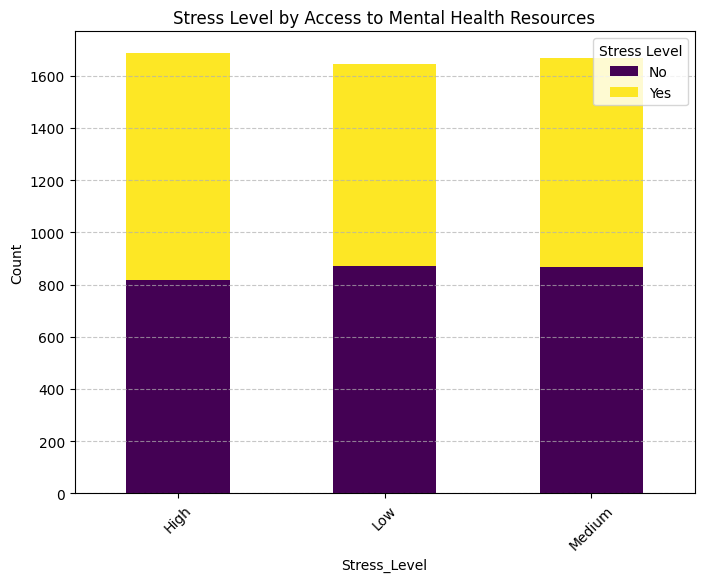

In [43]:

stress_resources = health.groupby([ 'Stress_Level', 'Access_to_Mental_Health_Resources',]).size().unstack()

stress_resources.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Stress Level by Access to Mental Health Resources')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stress Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

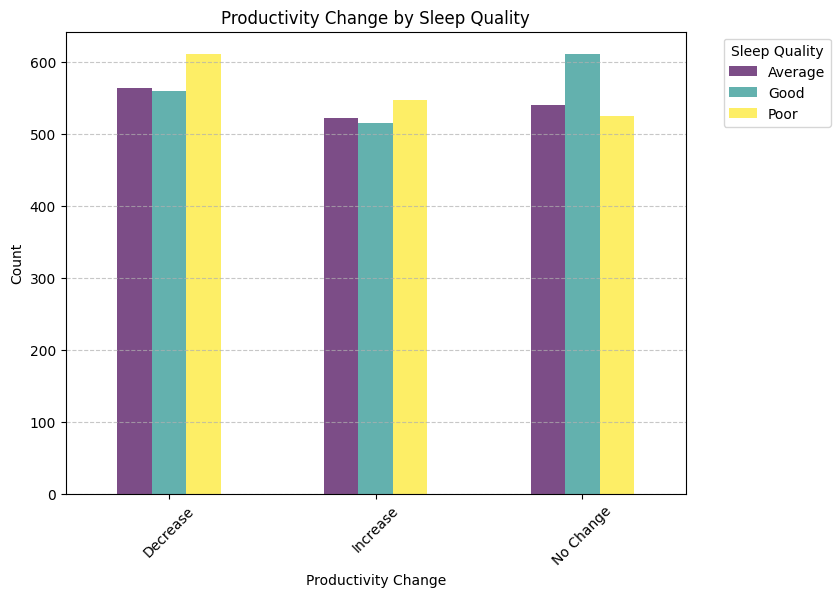

In [44]:
prod_sleep = health.groupby(['Productivity_Change', 'Sleep_Quality']).size().unstack(fill_value=0)
prod_sleep.plot(kind='bar', figsize=(8, 6), colormap='viridis', alpha=0.7)
plt.title('Productivity Change by Sleep Quality')
plt.xlabel('Productivity Change')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sleep Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


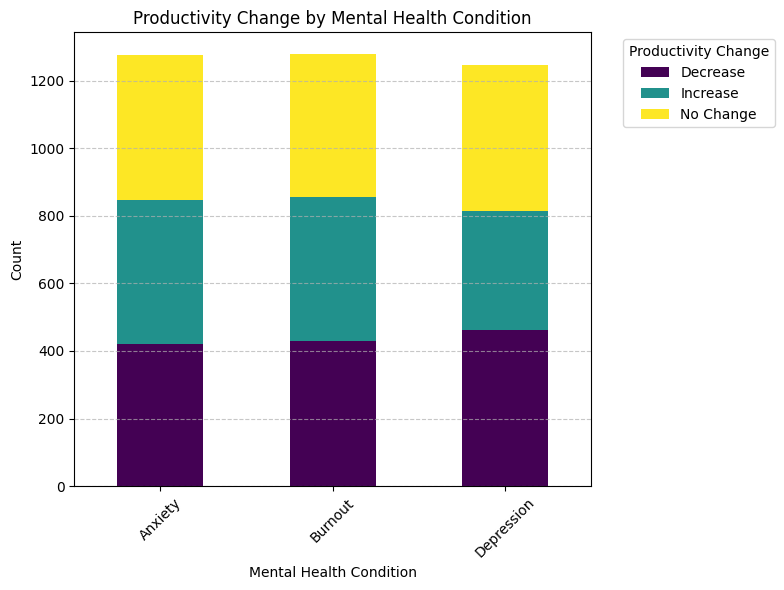

In [45]:
table = health.groupby(['Mental_Health_Condition', 'Productivity_Change']).size().unstack(fill_value=0)

table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

plt.title('Productivity Change by Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.legend(title='Productivity Change', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


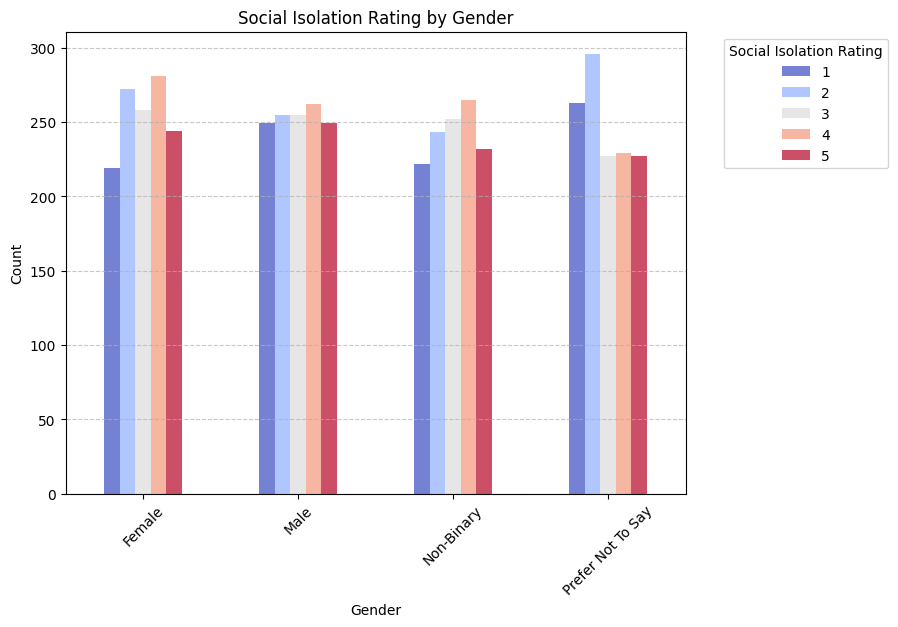

In [46]:
isolation_gender = health.groupby(['Gender', 'Social_Isolation_Rating']).size().unstack(fill_value=0)
isolation_gender.plot(kind='bar', figsize=(8, 6), colormap='coolwarm', alpha=0.7)
plt.title('Social Isolation Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Social Isolation Rating',  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

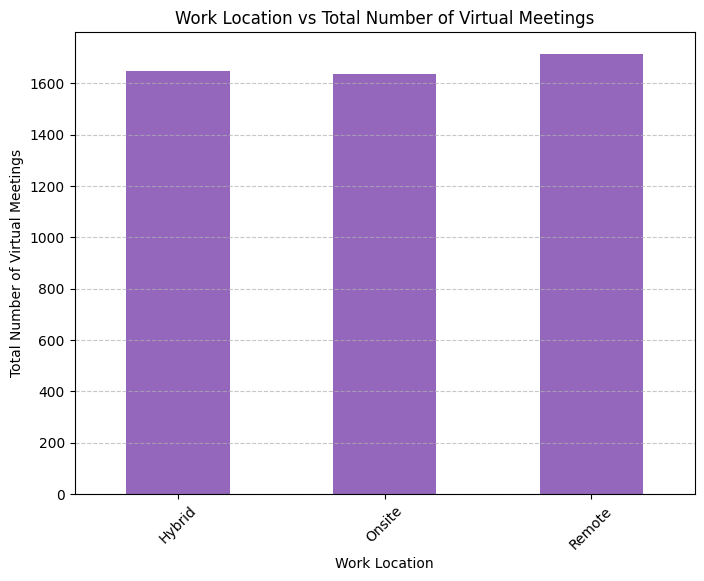

In [47]:
meetings_location = health.groupby('Work_Location')['Number_of_Virtual_Meetings'].count()
meetings_location.plot(kind='bar', figsize=(8, 6), color='#9467bd')
plt.title('Work Location vs Total Number of Virtual Meetings')
plt.xlabel('Work Location')
plt.ylabel('Total Number of Virtual Meetings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\patri\AppData\Local\Temp\ipykernel_15012\2222779108.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience_mental_health = health.groupby(['Experience_Binned', 'Access_to_Mental_Health_Resources']).size().unstack(fill_value=0)


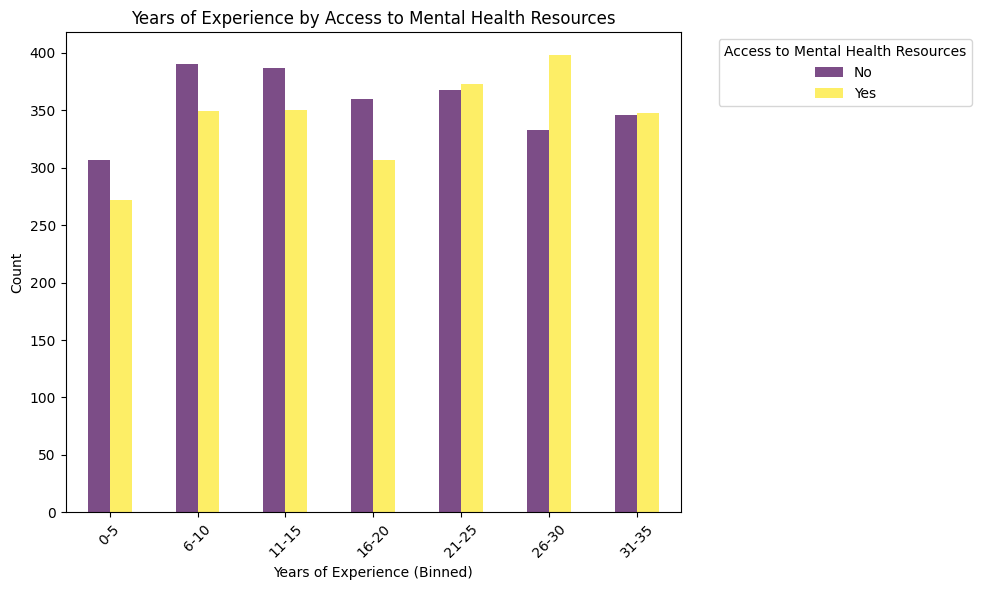

In [48]:
bins = [0, 5, 10, 15, 20, 25, 30, 35]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35'] 

health['Experience_Binned'] = pd.cut(health['Years_of_Experience'], bins=bins, labels=labels, right=False)

experience_mental_health = health.groupby(['Experience_Binned', 'Access_to_Mental_Health_Resources']).size().unstack(fill_value=0)

experience_mental_health.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='viridis', alpha= 0.7)
plt.title('Years of Experience by Access to Mental Health Resources')
plt.xlabel('Years of Experience (Binned)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Access to Mental Health Resources', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [49]:
tabla_frecuencias = pd.crosstab(health['Sleep_Quality'], health['Productivity_Change'], margins = True)
tabla_frecuencias

Productivity_Change,Decrease,Increase,No Change,All
Sleep_Quality,,,,
Average,565,522,541,1628
Good,560,516,611,1687
Poor,612,548,525,1685
All,1737,1586,1677,5000


In [50]:
tabla_frecuencias = pd.crosstab(health['Mental_Health_Condition'], health['Productivity_Change'], margins = True)
tabla_frecuencias

Productivity_Change,Decrease,Increase,No Change,All
Mental_Health_Condition,,,,
Anxiety,422,426,430,1278
Burnout,431,424,425,1280
Depression,461,354,431,1246
All,1314,1204,1286,3804


In [51]:
tabla_frecuencias = pd.crosstab(health['Gender'], health['Social_Isolation_Rating'], margins = True)
tabla_frecuencias

Social_Isolation_Rating,1,2,3,4,5,All
Gender,,,,,,
Female,219,272,258,281,244,1274
Male,249,255,255,262,249,1270
Non-Binary,222,243,252,265,232,1214
Prefer Not To Say,263,296,227,229,227,1242
All,953,1066,992,1037,952,5000


In [52]:
tabla_frecuencias = pd.crosstab(health['Stress_Level'], health['Access_to_Mental_Health_Resources'], margins = True)
tabla_frecuencias

Access_to_Mental_Health_Resources,No,Yes,All
Stress_Level,,,
High,817,869,1686
Low,870,775,1645
Medium,866,803,1669
All,2553,2447,5000


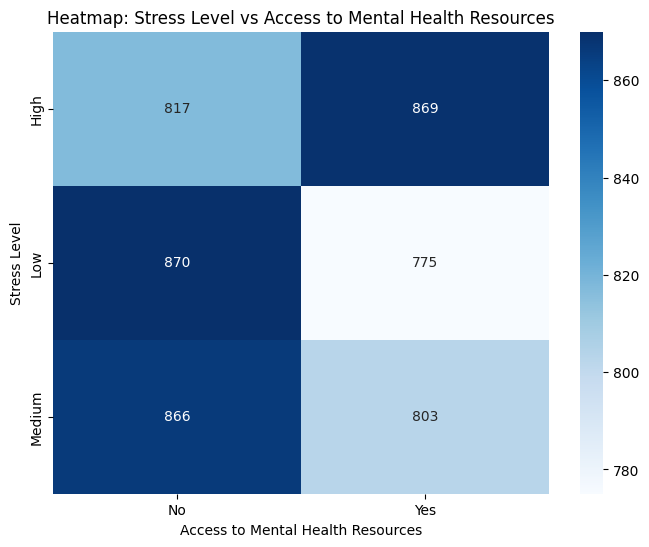

In [53]:
tabla_frecuencias = pd.crosstab(health['Stress_Level'], health['Access_to_Mental_Health_Resources'], margins=False)
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('Heatmap: Stress Level vs Access to Mental Health Resources')
plt.xlabel('Access to Mental Health Resources')
plt.ylabel('Stress Level')
plt.show()


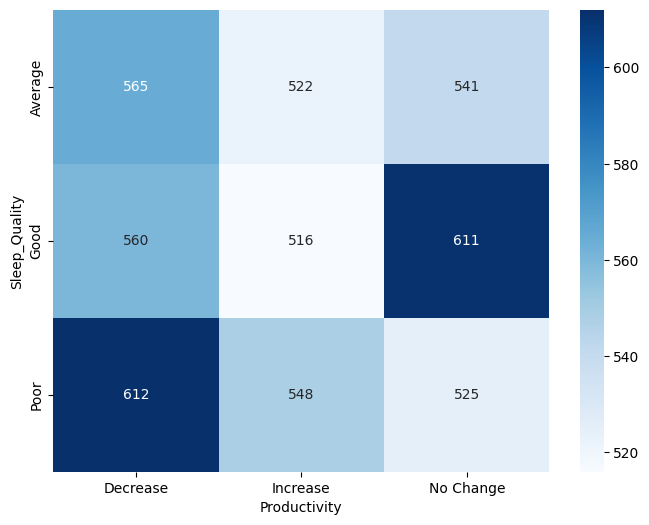

In [54]:
tabla_frecuencias = pd.crosstab(health['Sleep_Quality'], health['Productivity_Change'], margins=False)

plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Productivity')
plt.ylabel('Sleep_Quality')
plt.show()